# Dataset
[sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html)

In [ ]:
from sklearn import datasets

### アヤメの分類

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(type(iris), dir(iris))

<class 'sklearn.utils.Bunch'> ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [ ]:
print("data", type(iris.data))
print("feature_names", type(iris.feature_names))
print("filename", type(iris.filename))
print("target", type(iris.target))
print("target_names", type(iris.target_names))

data <class 'numpy.ndarray'>
feature_names <class 'list'>
filename <class 'str'>
target <class 'numpy.ndarray'>
target_names <class 'numpy.ndarray'>


In [ ]:
print("data", iris.data.shape)
print("feature_names", iris.feature_names)
print("filename", iris.filename)
print("target", iris.target.shape)
print("target_names", iris.target_names)

data (150, 4)
feature_names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
filename /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/iris.csv
target (150,)
target_names ['setosa' 'versicolor' 'virginica']


sepal:がく, petal:花弁


| setosa | versicolor | virginica | 
| ---- | ---- | ---- |
| <img src=https://upload.wikimedia.org/wikipedia/commons/8/85/Iris_setosa01.jpg width="200"> | <img src=https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg width="200"> | <img src=https://upload.wikimedia.org/wikipedia/commons/f/f8/Iris_virginica_2.jpg width="200"> |



### 手書き文字認識

In [ ]:
digits = datasets.load_digits()

In [ ]:
print(type(digits), dir(digits))

<class 'sklearn.utils.Bunch'> ['DESCR', 'data', 'images', 'target', 'target_names']


In [ ]:
print("data", type(digits.data))
print("images", type(digits.images))
print("target", type(digits.target))
print("target_names", type(digits.target_names))

data <class 'numpy.ndarray'>
images <class 'numpy.ndarray'>
target <class 'numpy.ndarray'>
target_names <class 'numpy.ndarray'>


In [ ]:
print("data", digits.data.shape)
print("images", digits.images.shape)
print("target", digits.target.shape)
print("target_names", digits.target_names)

data (1797, 64)
images (1797, 8, 8)
target (1797,)
target_names [0 1 2 3 4 5 6 7 8 9]


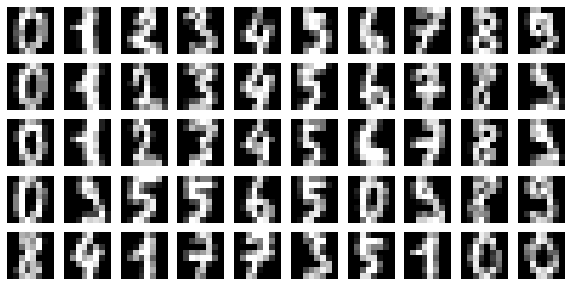

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))  # 1000x500に設定
for i, img in enumerate(digits.images[:50], 1):
  plt.subplot(5,10,i)  # (全体の行, 全体の列, 左から番号振ったときに何番目か)
  plt.imshow(img, cmap="gray")
  plt.axis('off')  # 軸削除
plt.show()

print(digits.target[:50])
print(digits.data[0])  # maxが15なので2^4で1pixelあたり4bit?

### 学習データとテストデータの分割

In [ ]:
import random
import numpy as np
from sklearn import datasets

random.seed(0)

iris = datasets.load_iris()

shuffle_idx = np.arange(len(iris.data))  # [0..150]データ数と同じサイズのインデックスのリスト
random.shuffle(shuffle_idx)  # 順序をランダムに入れ替え

# dataとtargetをshuffle_idxに従って並び替え
# dataとtargetは対応しているので同じ順序で並び替える (個別にシャッフルしない)
iris_data = iris.data[shuffle_idx]
iris_target = iris.target[shuffle_idx]

# 10%をテストデータに
test_num = int(len(iris_data) * 0.1)

iris_test_data = iris_data[:test_num]
iris_test_target = iris_target[:test_num]

iris_train_data = iris_data[test_num:]
iris_train_target = iris_target[test_num:]

print(f"iris: train({len(iris_train_data)}) test({len(iris_test_data)})")

# 上と同じようにdigitsも
digits = datasets.load_digits()

shuffle_idx = np.arange(len(digits.data))
random.shuffle(shuffle_idx)

digits_data = digits.data[shuffle_idx]
digits_target = digits.target[shuffle_idx]

test_num = int(len(digits_data) * 0.1)

digits_test_data = digits_data[:test_num]
digits_test_target = digits_target[:test_num]

digits_train_data = digits_data[test_num:]
digits_train_target = digits_target[test_num:]

print(f"digits: train({len(digits_train_data)}) test({len(digits_test_data)})")

iris: train(135) test(15)
digits: train(1618) test(179)
